<h1><center>Pneumonia Detection Using X-Rays</center></h1>

<h3><center>Implemented using Convolution Neural Network (CNN)</center></h3>

#### Project Workflow

#### Importing the libraries

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense, BatchNormalization
from keras import backend as K
import os
import numpy as np
import pandas as pd

#### Specifying the path of the data

In [49]:
train = "chest_xray/train"
test = "chest_xray/test"
val = "chest_xray/val"

In [31]:
# ImageDataGenerator Generate batches of tensor image data with real-time data augmentation.
# The data will be looped over (in batches)
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, rotation_range = 30,
                                   width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True, vertical_flip=False)
test_datagen = ImageDataGenerator(rescale = 1./255)

###### 1.Here we import images directly from Directory by using flow_from_directory method.
###### 2.flow_from_directory() automatically infers the labels from the directory structure of the folders containing images.

In [32]:
train_gen = train_datagen.flow_from_directory(train,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 5216 images belonging to 2 classes.


In [33]:
test_gen = train_datagen.flow_from_directory(test,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 624 images belonging to 2 classes.


In [34]:
val_gen = train_datagen.flow_from_directory(val,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = "binary" )

Found 16 images belonging to 2 classes.


#### Initialize The Model and Add CNN And Dense Layers

In [35]:
# Initialize The Model
model = Sequential()

# The number of filters are 32 and the kernal_size is (3,3)

# Add the convolution layer
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))

# Add the activation layer
model.add(Activation('relu'))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# adding the flatten layer 
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#### Configuring The Learning Process 

In [36]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["acc"])

#### Fit the Model and train the model

In [37]:
history = model.fit_generator(train_gen,
                         steps_per_epoch = 163,
                         epochs = 20,
                         validation_data = val_gen,
                         validation_steps = 1)

C:\Users\ANSHUL~1\AppData\Local\Temp/ipykernel_7720/1678280275.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/20
163/163 [==============================] - 387s 2s/step - loss: 0.5949 - acc: 0.7303 - val_loss: 0.7083 - val_acc: 0.5000
Epoch 2/20
163/163 [==============================] - 310s 2s/step - loss: 0.4775 - acc: 0.7717 - val_loss: 0.7097 - val_acc: 0.7500
Epoch 3/20
163/163 [==============================] - 310s 2s/step - loss: 0.3609 - acc: 0.8395 - val_loss: 0.4129 - val_acc: 0.8750
Epoch 4/20
163/163 [==============================] - 313s 2s/step - loss: 0.3128 - acc: 0.8641 - val_loss: 0.7546 - val_acc: 0.6875
Epoch 5/20
163/163 [==============================] - 308s 2s/step - loss: 0.2628 - acc: 0.8905 - val_loss: 0.9935 - val_acc: 0.6250
Epoch 6/20
163/163 [==============================] - 313s 2s/step - loss: 0.2533 - acc: 0.8949 - val_loss: 0.9944 - val_acc: 0.6875
Epoch 7/20
163/163 [==============================] - 313s 2s/step - loss: 0.2183 - acc: 0.9149 - val_loss: 1.1450 - val_acc: 0.6250
Epoch 8/20
163/163 [==============================] - 313s 2s/step - 

In [38]:
#Accuracy of test data.
test_acc = model.evaluate_generator(test_gen,624/32)
print("\nAccuracy:"+" %.2f%%" % ( test_acc[1]*100))

C:\Users\ANSHUL~1\AppData\Local\Temp/ipykernel_7720/2894057890.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_acc = model.evaluate_generator(test_gen,624/32)



Accuracy: 86.38%


#### Save The Model

In [39]:
model.save("pneumonia.h5")

In [40]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

#### Testing the model 

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

#### Load the model 

In [42]:
model = load_model("pneumonia.h5")

In [43]:
from skimage.transform import resize

In [44]:
def detect(frame):
    try:
        img = resize(frame, (150,150))
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        print(prediction)
        prediction = prediction > 0.5
        print(prediction)
        s = "PNEUMONIA" if (prediction[0][0]) else "NORMAL"
        return (s)
    except AttributeError:
        print("SHAPE NOT FOUND")

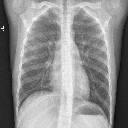

In [45]:
image.load_img("test1.jpeg",target_size = (128,128))

In [46]:
frame = cv2.imread("test1.jpeg")
data = detect(frame)
data

1/1 [==============================] - 0s 334ms/step
[[0.24361739]]
[[False]]


'NORMAL'

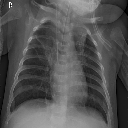

In [47]:
image.load_img("test2.jpeg",target_size = (128,128))

In [48]:
frame = cv2.imread("test2.jpeg")
data = detect(frame)
data

1/1 [==============================] - 0s 38ms/step
[[0.98950994]]
[[ True]]


'PNEUMONIA'